
# Library Imports

For libraries we'll use Tensorflow and numpy, nltk and also WordCloud. WordCloud is a text visualisation Python Package, it will help us to visualize words and how they are actually distributed inside the text data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Exploring Fake News

Load and visualize Dataset imported from kaggle
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [6]:
fake_datasets = pd.read_csv('data/Fake.csv')

In [7]:
fake_datasets.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
fake_datasets.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
fake_datasets['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

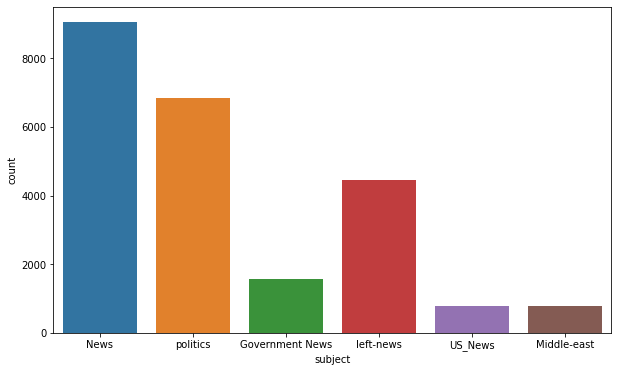

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject',data= fake_datasets)


### WordCloud

In [11]:
# Join all the text data with a space
text = ''.join(fake_datasets['text'].tolist())

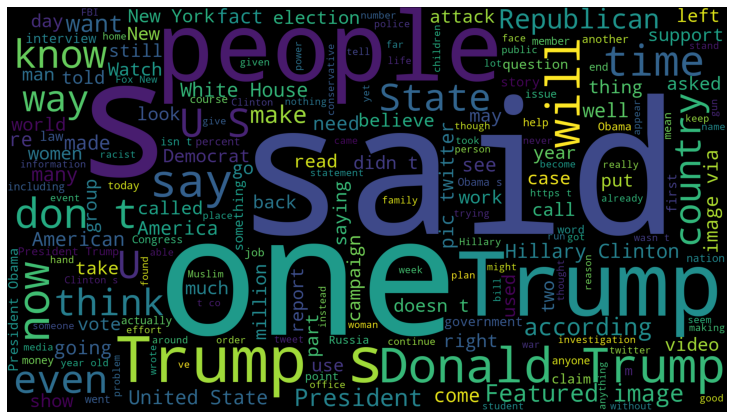

In [12]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Exploring Real News

Load and visualize real news datasets from kaggle

In [14]:
real_datasets = pd.read_csv('data/True.csv')

In [15]:
real_datasets.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [16]:
real_datasets['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

### WordCloud

In [17]:
text = ''.join(real_datasets['text'].tolist())

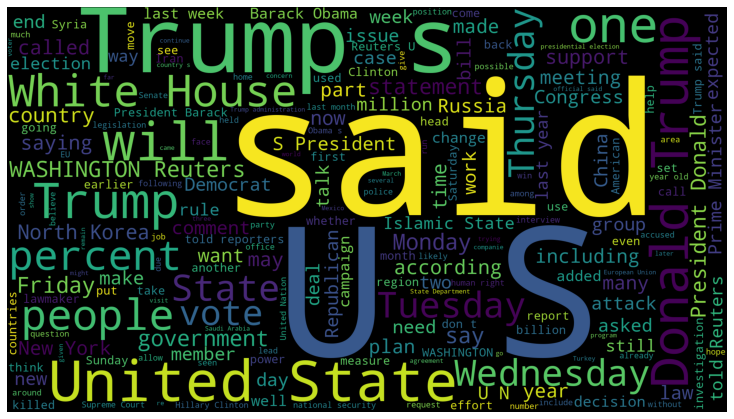

In [18]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
real_datasets.sample(5)

,title,text,subject,date
10099,Trump sued in Kentucky by three who say he inc...,"LOUISVILLE, Ky. (Reuters) - Three people who c...",politicsNews,"April 1, 2016"
777,Chinese media upbeat on U.S. ties ahead of Tru...,BEIJING (Reuters) - China and the United State...,politicsNews,"November 8, 2017"
19458,Pope candidly admits Church 'arrived late' in ...,"VATICAN CITY (Reuters) - Pope Francis, in some...",worldnews,"September 21, 2017"
3766,White House will not say if Israel provided in...,WASHINGTON (Reuters) - The White House decline...,politicsNews,"May 16, 2017"
15668,"Saudi king sacks top ministers, gives more pow...",RIYADH (Reuters) - Saudi King Salman appointed...,worldnews,"November 4, 2017"


# Clean Data

Real News data have source of publication which is not present in fake news set.


*   Most of text contains reuters information such as "WASHINGTON Reuters"
*   Some text are tweets from Twitter
*   Few text do not contain any publication info

So, in order to clean the data we have to remove the Reuters and Twitter tweet information from the text.

*   Split text only once at "-", this give us publication part and text part.
*   If we do not get text part, this means publication details wasn't given for that record.
*   Twitter tweet always have same source, a long text of max 259 characters.



In [20]:
real_datasets.text.values

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support

In [21]:
# Create a list of indexes which do not have a publication information
unknown_publishers = []
for index, row in enumerate(real_datasets.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)

  except:
    unknown_publishers.append(index)

In [22]:
len(unknown_publishers)

222

In [23]:
real_datasets.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [24]:
# Extract the publisher information from the text data
publisher = []
tmp_text = []  # for unknown publisher

for index, row in enumerate(real_datasets.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1])


In [25]:
real_datasets['text'] = tmp_text
real_datasets['publisher'] = publisher

In [26]:
real_datasets.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [27]:
real_datasets.shape

(21417, 5)

In [28]:
# to see how many indexes has empty data
empty_fake_index = [index for index,text in enumerate(fake_datasets.text.tolist()) if str(text).strip()==""]

In [29]:
fake_datasets.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [30]:
# remove the empty text data from the datasets by concatenating the title with the text
real_datasets['text'] = real_datasets['title'] + " " + real_datasets['text']
fake_datasets['text'] = fake_datasets['title'] + " " + fake_datasets['text']

In [31]:
# change all the text data into a lower case
real_datasets['text'] = real_datasets['text'].apply(lambda x: str(x).lower())
fake_datasets['text'] = fake_datasets['text'].apply(lambda x: str(x).lower())

# Text Preprocessing

In [32]:
# Labeling the data, Fake news as label 0 and Real news label 1
real_datasets['class'] = 1
fake_datasets['class'] = 0

In [33]:
real_datasets.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [34]:
# Combine columns we only need the text and the class
real_datasets = real_datasets[['text', 'class']]

In [35]:
fake_datasets = fake_datasets[['text', 'class']]

In [36]:
# Combine the sub-datasets in one
data = real_datasets.append(fake_datasets, ignore_index=True)

In [37]:
data.sample(5)

,text,class
40086,black harvard students host separate segregate...,0
38266,"which states are americans are moving from, wh...",0
9672,scottish isle a world away from fireworks of n...,1
40823,exposed: why a liberal’s defense of radical is...,0
39490,media goes crazy over hillary wishing she woul...,0


In [38]:
# remove special characters
# https://github.com/laxmimerit/preprocess_kgptalkie
#!pip install spacy==2.2.3
#!python -m spacy download en_core_web_sm
#!pip install beautifulsoup4==4.9.1
#!pip install textblob==0.15.3

In [39]:
#!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [40]:
import preprocess_kgptalkie as ps

In [41]:
#remove special characters
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [43]:
#exemple 
ps.remove_special_chars('this ,. @ # is grea@t')

'this is great'

In [46]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1



# Vectorization -- Word2Vec

Word2Vec is one of the most popular technique to learn word embedding using shallow neural network.

Word embedding is the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words,etc.
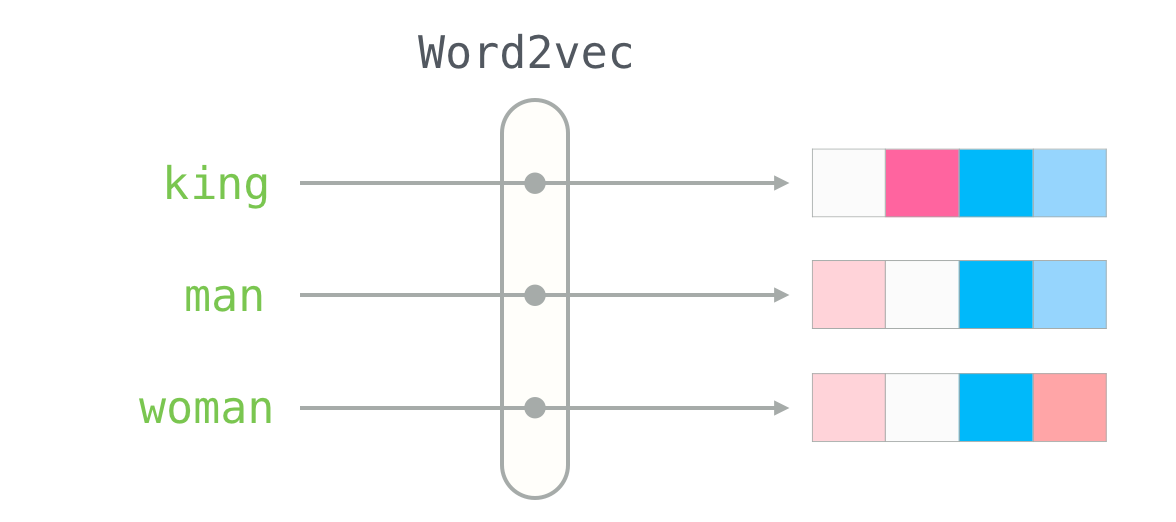

In [65]:
# word2vec converting
import gensim

In [58]:
y = data['class'].values

In [59]:
# list of list data
X = [d.split() for d in data['text'].tolist()]

In [60]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [70]:
# each of the words are converted into a sequence of 100 dim ( vectors )
DIM = 100
# default size 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [71]:
# len(w2v_model.wv)
len(w2v_model.wv)

231911

In [72]:
# most semilar words
w2v_model.wv.most_similar('love')

[('applaud', 0.7191226482391357),
 ('thank', 0.7132004499435425),
 ('wish', 0.674994170665741),
 ('appreciate', 0.6737997531890869),
 ('admire', 0.6611494421958923),
 ('bless', 0.6406912207603455),
 ('loving', 0.624692976474762),
 ('suppose', 0.6242663860321045),
 ('loved', 0.6231459975242615),
 ('wonderful', 0.6215139627456665)]

### Tokenize the words
The first step to preparing text to be used in a machine learning model is to tokenize the text, in other words, to generate numbers for the words.

In [73]:
# Call fit_on_text() on the tokenizer to generate unique numbers for each word
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

 **Create sequences for the sentences**
After we tokenize the words, the word index contains a unique number for each word. However, the numbers in the word index are not ordered. Words in a sentence have an order. So after tokenizing the words, the next step is to generate sequences for the sentences.

In [74]:
X= tokenizer.texts_to_sequences(X)

In [76]:
#X

**View the word index** 
After we tokenize the text, the tokenizer has a word index that contains key-value pairs for all the words and their numbers.

The word is the key, and the number is the value.

In [77]:
# Examine the word index
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

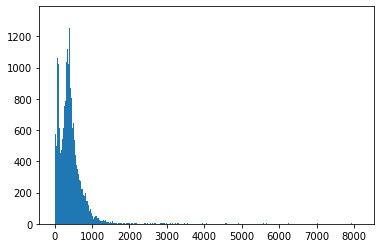

In [78]:
# plot the total numbers of words
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [79]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1584

In [80]:
#padding
max_length = 1000
X = pad_sequences(X, maxlen=max_length)

In [81]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [82]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  
  return weight_matrix

In [83]:
embedding_vectors = get_weight_matrix(w2v_model)

In [84]:
embedding_vectors.shape

(231912, 100)

Create the ML model

In [85]:
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (fake or real)
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=max_length, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23191200  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,308,577
Trainable params: 117,377
Non-trainable params: 23,191,200
_________________________________________________________________


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [88]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 437s 591ms/step - loss: 0.1404 - accuracy: 0.9476 - val_loss: 0.0770 - val_accuracy: 0.9717
Epoch 2/6
737/737 [==============================] - 432s 586ms/step - loss: 0.0469 - accuracy: 0.9839 - val_loss: 0.0387 - val_accuracy: 0.9872
Epoch 3/6
737/737 [==============================] - 432s 586ms/step - loss: 0.0272 - accuracy: 0.9905 - val_loss: 0.0277 - val_accuracy: 0.9910
Epoch 4/6
737/737 [==============================] - 434s 589ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0230 - val_accuracy: 0.9923
Epoch 5/6
737/737 [==============================] - 429s 582ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0197 - val_accuracy: 0.9926
Epoch 6/6
737/737 [==============================] - 435s 591ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0209 - val_accuracy: 0.9942


In [89]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

In [90]:
score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.994


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5875
           1       1.00      0.99      0.99      5350

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



Confusion matrix, without normalization


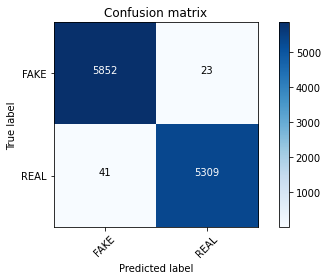

In [92]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [185]:
#x = ['The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018.']
#x = ['C’est un générateur de breaking news qui a entraîné le partage et la reprise d’une fausse info : Dernière nouvelle : la cocaïne tue le coronavirus. Une fausse annonce qui a énormément tourné sur les réseaux sociaux, notamment au Nigéria mais également en Europe. La cellule fact check de l’AFP a vérifié en interrogeant ladministrateur général de l’Institut Pasteur de Dakar, lun des deux centres de référence en Afrique. Et la réponse est claire : Non, la cocaïne ne soigne pas le coronavirus.']
x = ['A fake news story is picked up by a major media talk show host.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=max_length)

[[4, 602, 93, 296, 11, 2664, 63, 20, 4, 337, 118, 598, 237, 713]]


In [182]:
(model.predict(x) >=0.5).astype(int)

array([[0]])

In [183]:
predict ='FAKE' if ((model.predict(x) >=0.5).astype(int)).all() == 0 else 'REAL'
print(predict)

FAKE


In [189]:
import pickle
pickle.dump(model, open('model2.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://37011f2b-b7bf-43a4-a545-793ab9df9482/assets


INFO:tensorflow:Assets written to: ram://37011f2b-b7bf-43a4-a545-793ab9df9482/assets


In [100]:
pickle.dump(w2v_model, open('w2v_model2.pkl', 'wb'))

In [184]:
job_model = pickle.load(open('model2.pkl', 'rb')) 
val_pkl = x
predict ='FAKE' if ((job_model.predict(val_pkl)>=0.5).astype(int)).all() == 0 else 'REAL'
print(predict)


FAKE


In [191]:
import pickle
pickle.dump(tokenizer, open('tokenizer2.pkl', 'wb'))